## <b>PROBLEM STATEMENT:</b>

<b><em>Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
        
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. </em></b>

#### You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

C:\Users\Prashant\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Importing Customer Churn Analysis dataset Csv file using pandas

In [3]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [4]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# As we have 31 Columns Lets sort Columns by their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Comment :
- We have 7043 Rows and 21 Columns in this Telecom Dataset.
- <b> We have target Variable 'Churn' with object datatype, leading this to classification problem.</b>
- <b> There is interesting entry here under object datatype which is 'TotalCharges'. <u>This feature is numerical in nature but categories as Object datatypes.</u> This implies that there is presence of string variable in this column or might be data error.</b>
- 'SeniorCitizen' is categorical variable listed as Numerical variable. So we gone convert it into object datatype.
- At end we have 3 Numerical variable and 18 categorical variable. Out of which 'CustomerID' is unnecessary variable from our  analytical & modelling viewpoint.<b> We will drop 'CustomerID' column.</b>

   
#### We are going to Group Variable into Numerical and Categorical variables list in order to simplify further analysis. Next thing is droping CustomerID Column.

In [6]:
df.drop(['customerID'],axis=1,inplace=True)

# Statistical Analysis

<b> Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

<b> Since dataset is large, Let check for any entry which is repeated or duplicated in dataset. </b>

In [7]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

22

<b> We can see that 22 duplicate entry in dataset. Let drop duplicated entry from dataset. </b>

In [8]:
df.drop_duplicates(keep='last',inplace= True)

In [9]:
df.shape

(7021, 20)

In [10]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### Now check for any whitespaces, NA,'-' in dataset. We might find something in TotalCharges column by considering Object datatype .

In [11]:
df[df["TotalCharges"].isin([' ','NA','-'])==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


<b> There is possibility of whitespaces in TotalCharges column. lets deal with it.</b>

In [12]:
# Replaceing Whitespaces with null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [13]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

In [14]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

<b> We have remove whitespaces so let now check for missing values</b>

#### We can impute missing value in TotalCharges either with mean and median. We can decide imputation method after checking distribution and Outliers in data

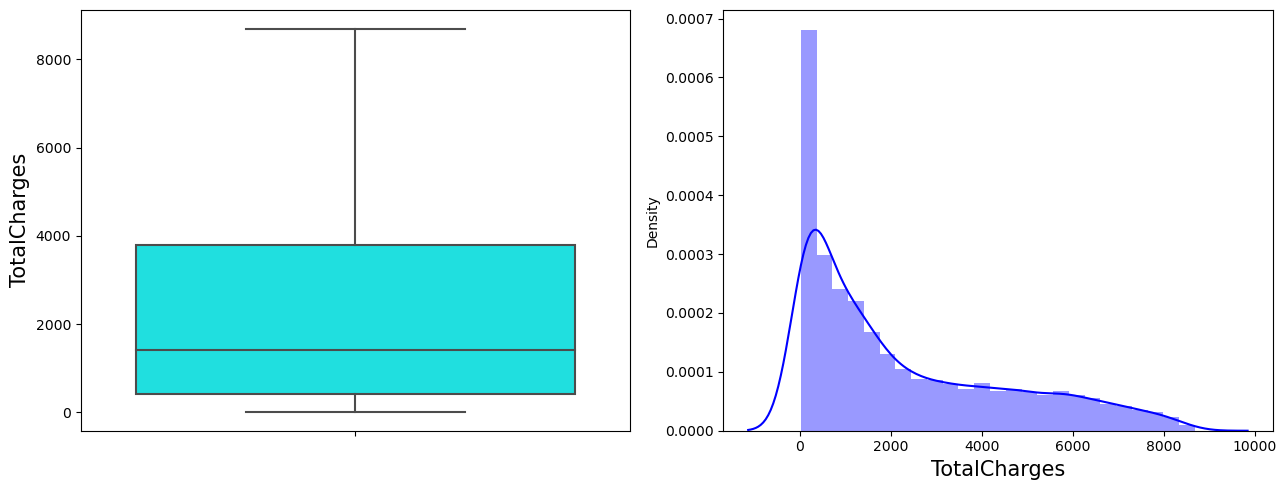

In [15]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
print("Mean of TotalCharges:",df['TotalCharges'].mean())
print("Median of TotalCharges:",df['TotalCharges'].median())

Mean of TotalCharges: 2290.3533880171185
Median of TotalCharges: 1410.25


#### Observation:
- We can see that Outliers doesnot exist, so no mean sensitivity issue present here.
- Distribution plot shows that Total Charges feature is right skewed.
- Mean is greater than Median.

<b> Considering above observation we can impute Missing value with Mean.</b>

#### Imputation of Missing value in TotalCharges with Mean

In [17]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

#### Checking for Null values after Imputation

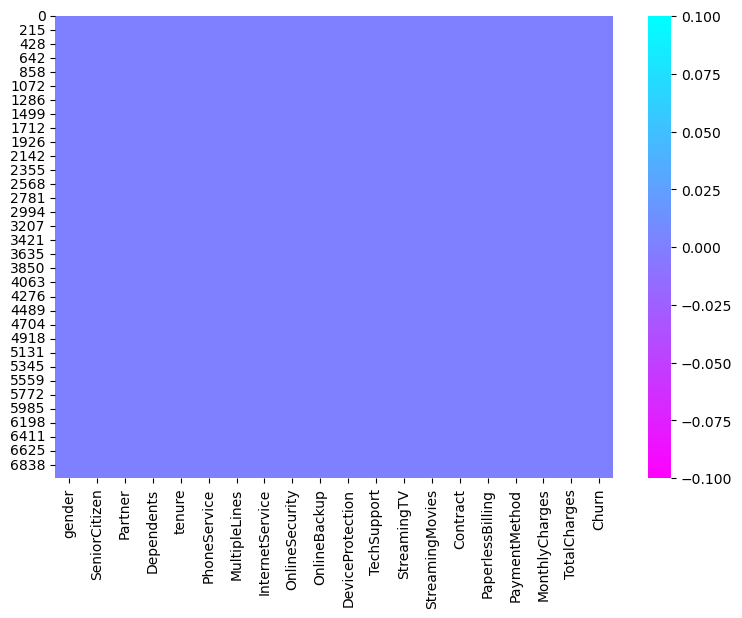

In [18]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

#### Comment :
<b> Finally, No Missing Value is Present.

We are Now Yes To Go Further !!!</b>

### Statistical Matrix

In [19]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.000000,0.162512,0.368947,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7021.000000,32.469449,24.534965,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7021.000000,64.851894,30.069001,18.250000,35.750000,70.400000,89.900000,118.750000
TotalCharges,7021.000000,2290.353388,2265.044136,18.800000,411.150000,1410.250000,3801.700000,8684.800000


In [20]:
df[Categorical].describe().T

NameError: name 'Categorical' is not defined

#### The best way to avoid customer churn is to know your customers, and the best way to know your customer is through historical and new customer data.
#### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [21]:
Numerical=df.select_dtypes(exclude="object")
Categorical=df.select_dtypes(include="object")

In [22]:
for i in Categorical:
    print(df[i].value_counts())
    print("="*100)

gender
Male      3541
Female    3480
Name: count, dtype: int64
Partner
No     3619
Yes    3402
Name: count, dtype: int64
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: count, dtype: int64
StreamingTV
No                     2802
Y

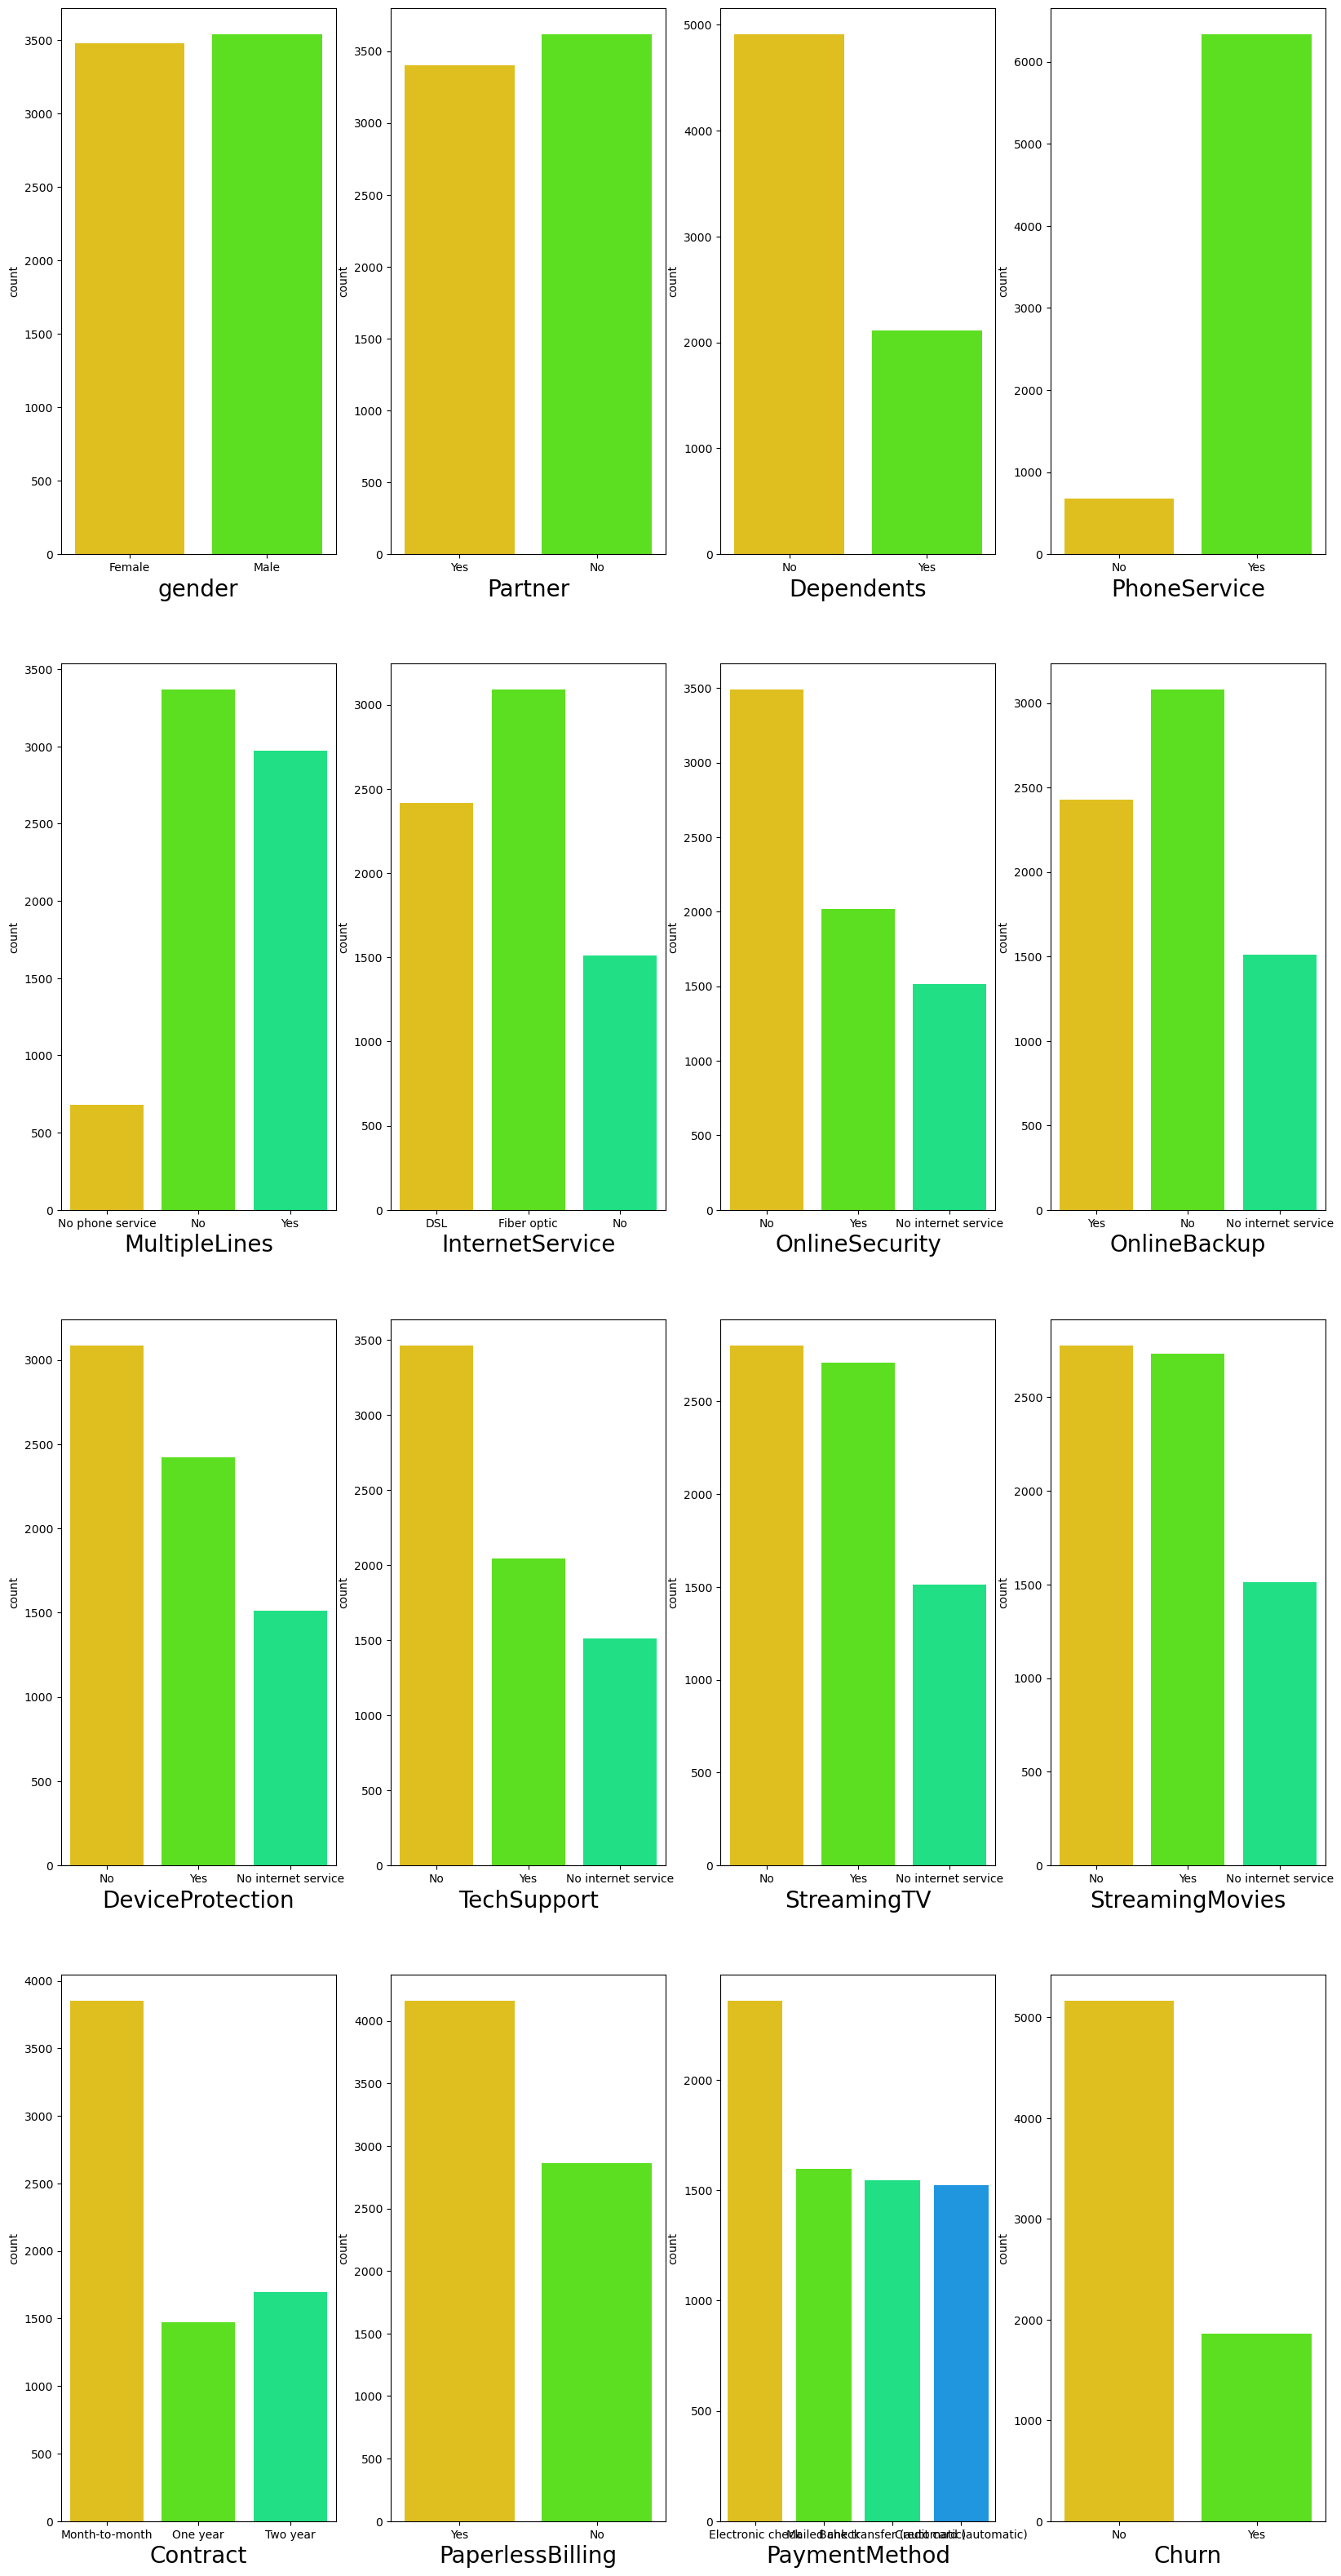

In [23]:
sns.set_palette('hsv')
plt.figure(figsize=(20,40), facecolor='white')
plotnumber =1
for i in Categorical:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

<b> Now Start exploreing feature one by one, begin with Target Feature </b>

## Target Variable Churn

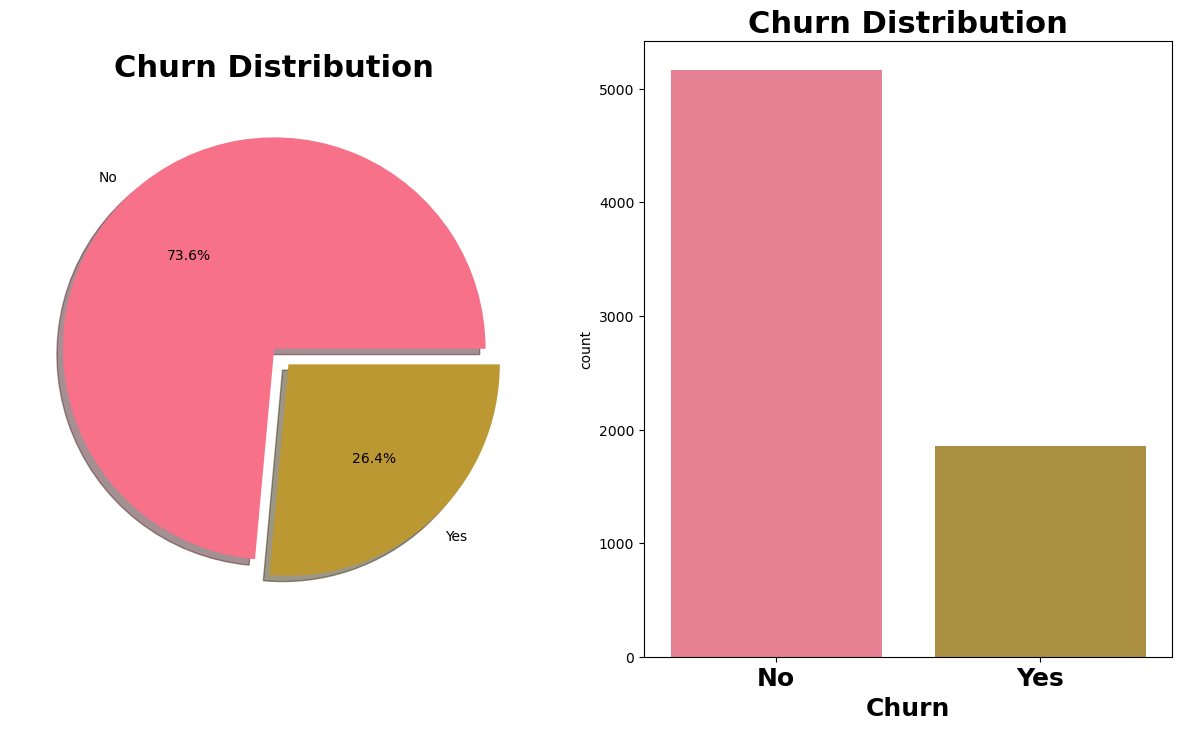

In [24]:
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%', 
                                    ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Comment :
- 26.4 % Customer choose to churn service in last month. Which is quite high number.This all leads to imbalanced data case as churn is our target variable.

<b> Let start exploration of Independent feature to figure where customer are unstatisfied and what are customers need or inclination in cutting edge competition.</b> 

### Gender vs Churn : Can there exist any trend between gender & churn or any impact of gender on Churn?

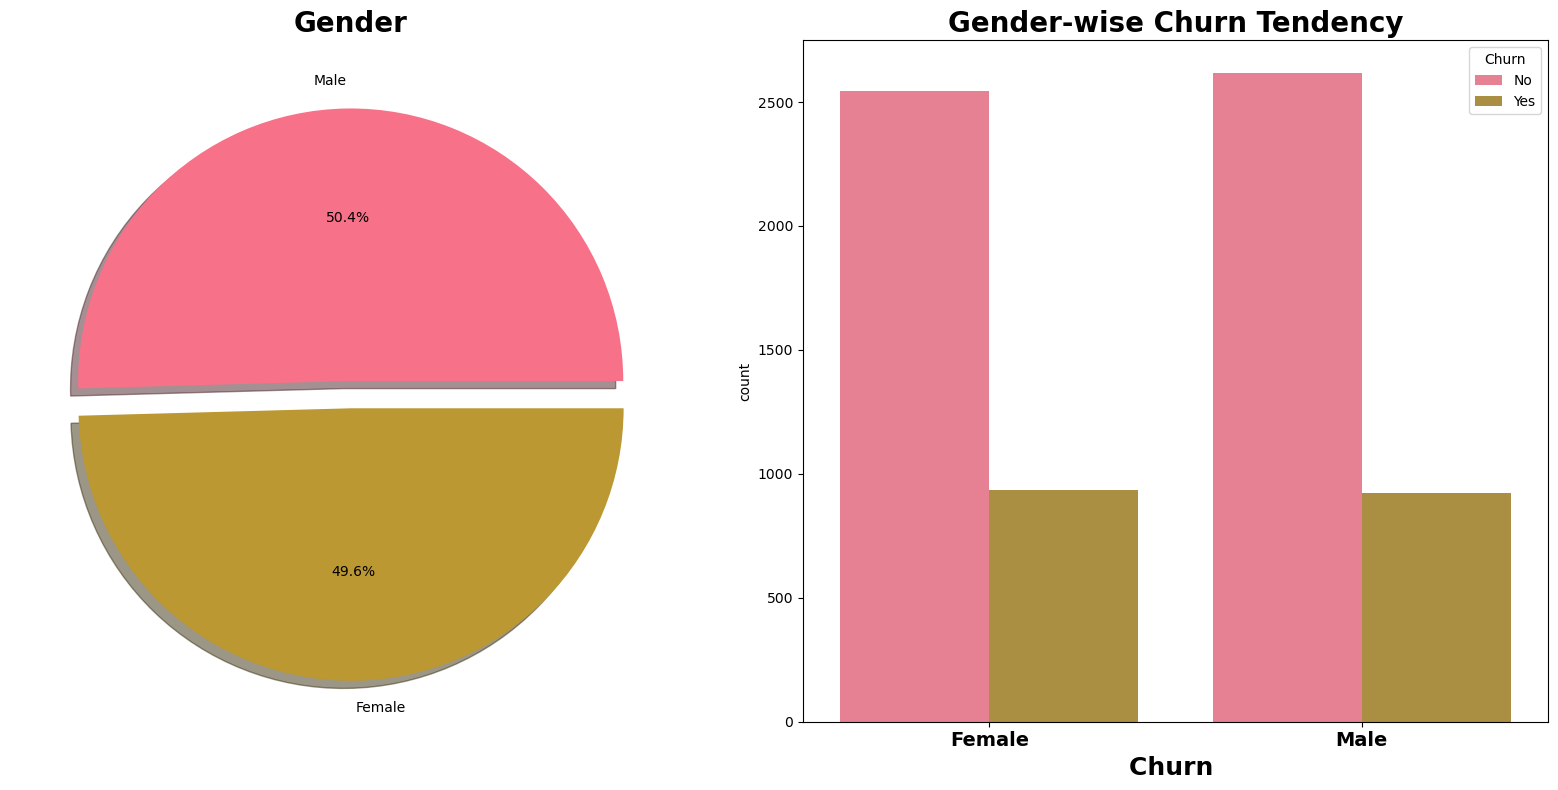

In [25]:

sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(df['gender'],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Comment :
- Data contain both gender almost in same proportion with minor difference.
- Both gender have tendency of attrition in same percentage.

### Next Investigate Senior Citizen vs Gender Wise Churn Tendency

<b>Lets see how many of them are Senior Citizen and Churn tendency in senior citizen </b>

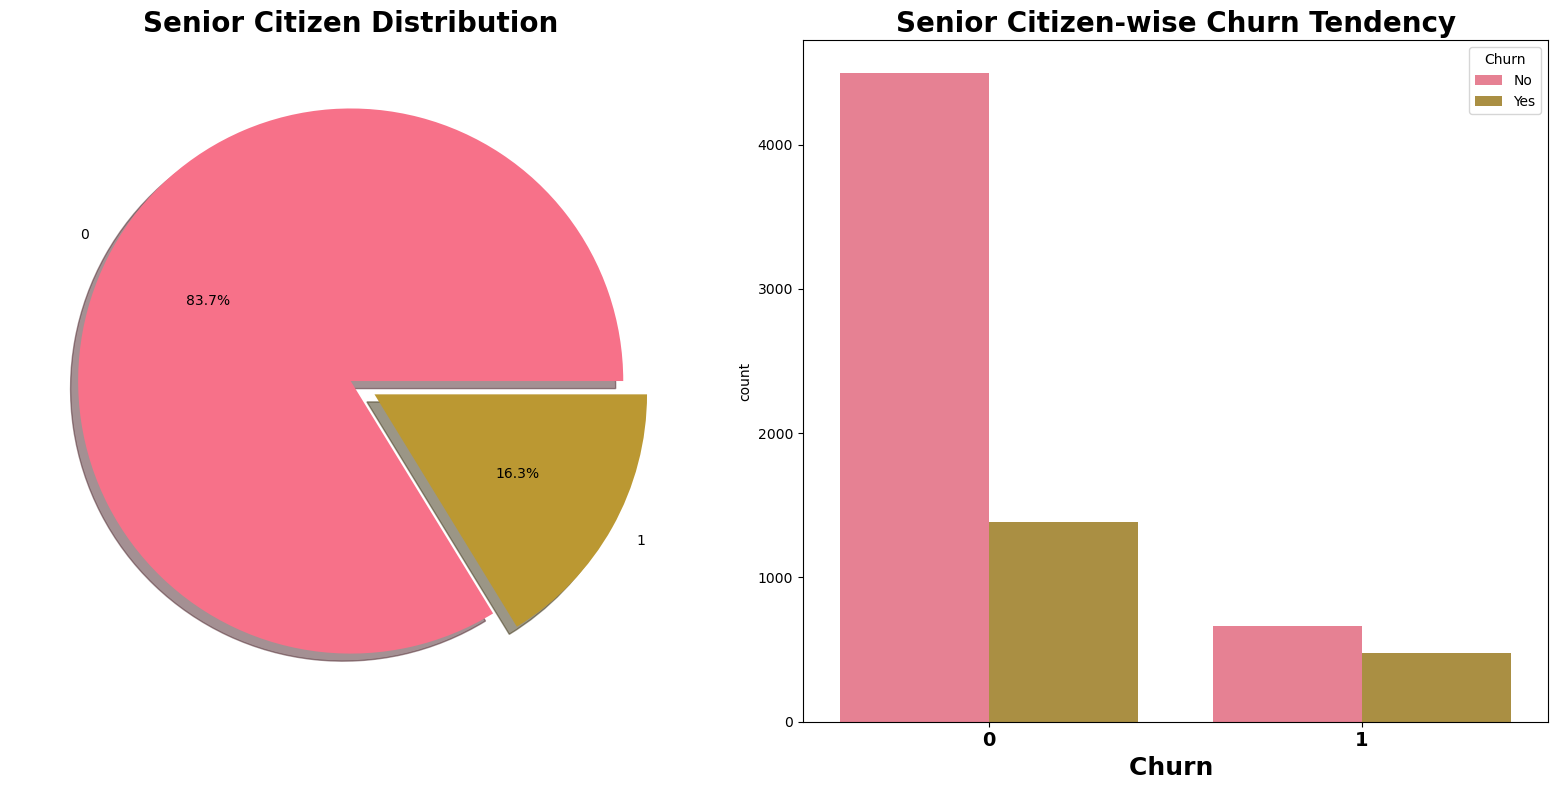

In [26]:
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

 <b>There are only 16.3 % of the customers who are senior citizens. Thus most of our customers in the data are younger people.</b>

In [27]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

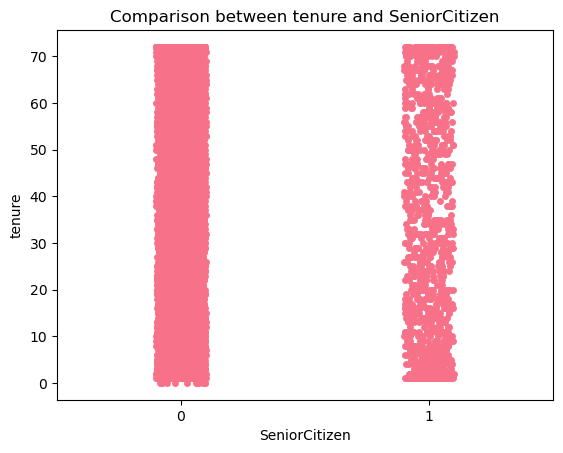

In [28]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

**Around 16% customer are Senior citizen and form countplot we can see they have more tendency to churn.**

**There is no significant relation between Senior Citizen and Tenure.**

### Effect of Partner and Dependents on Churn

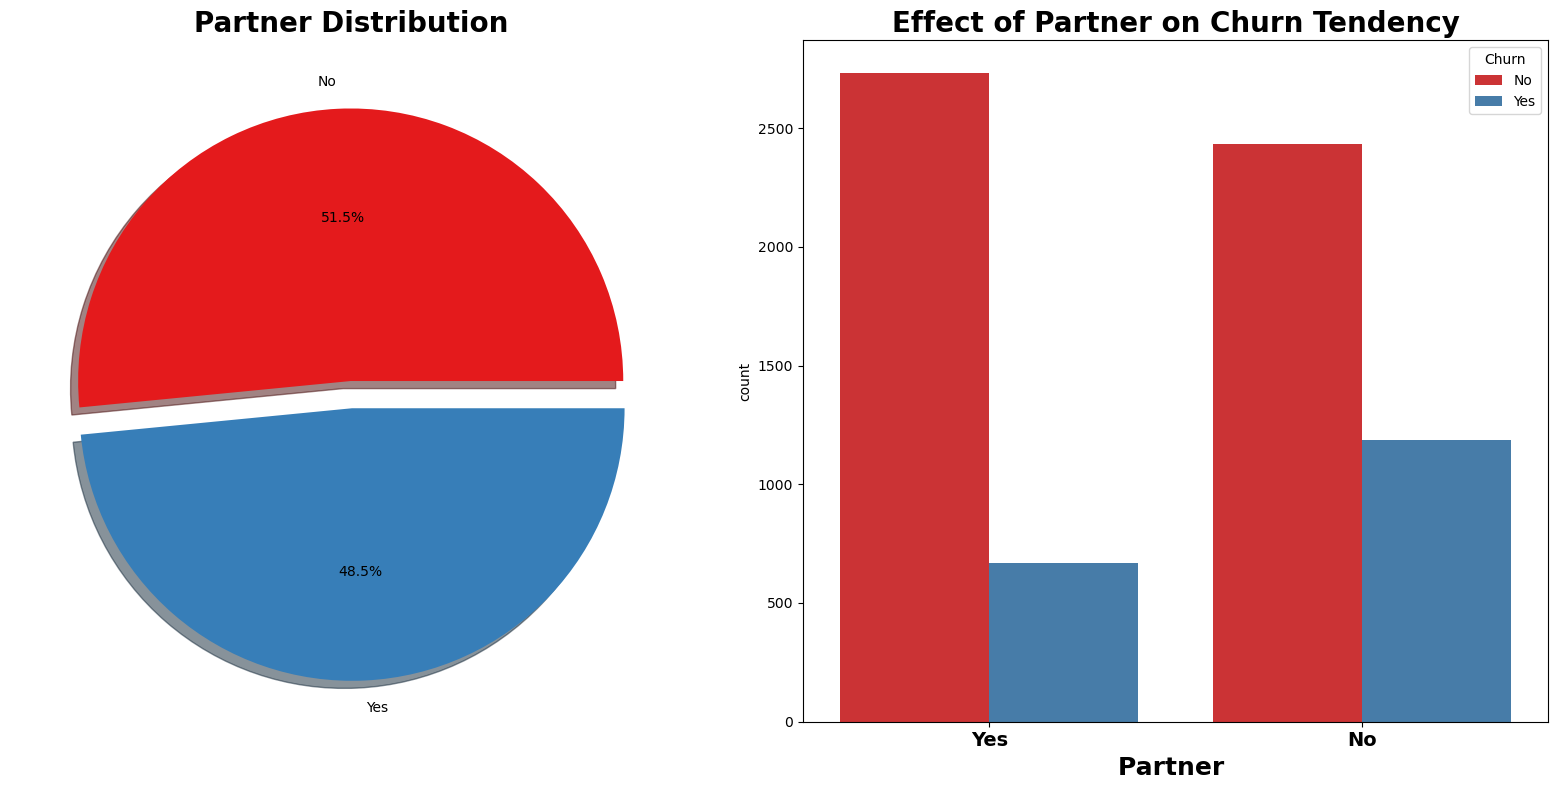

In [29]:
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

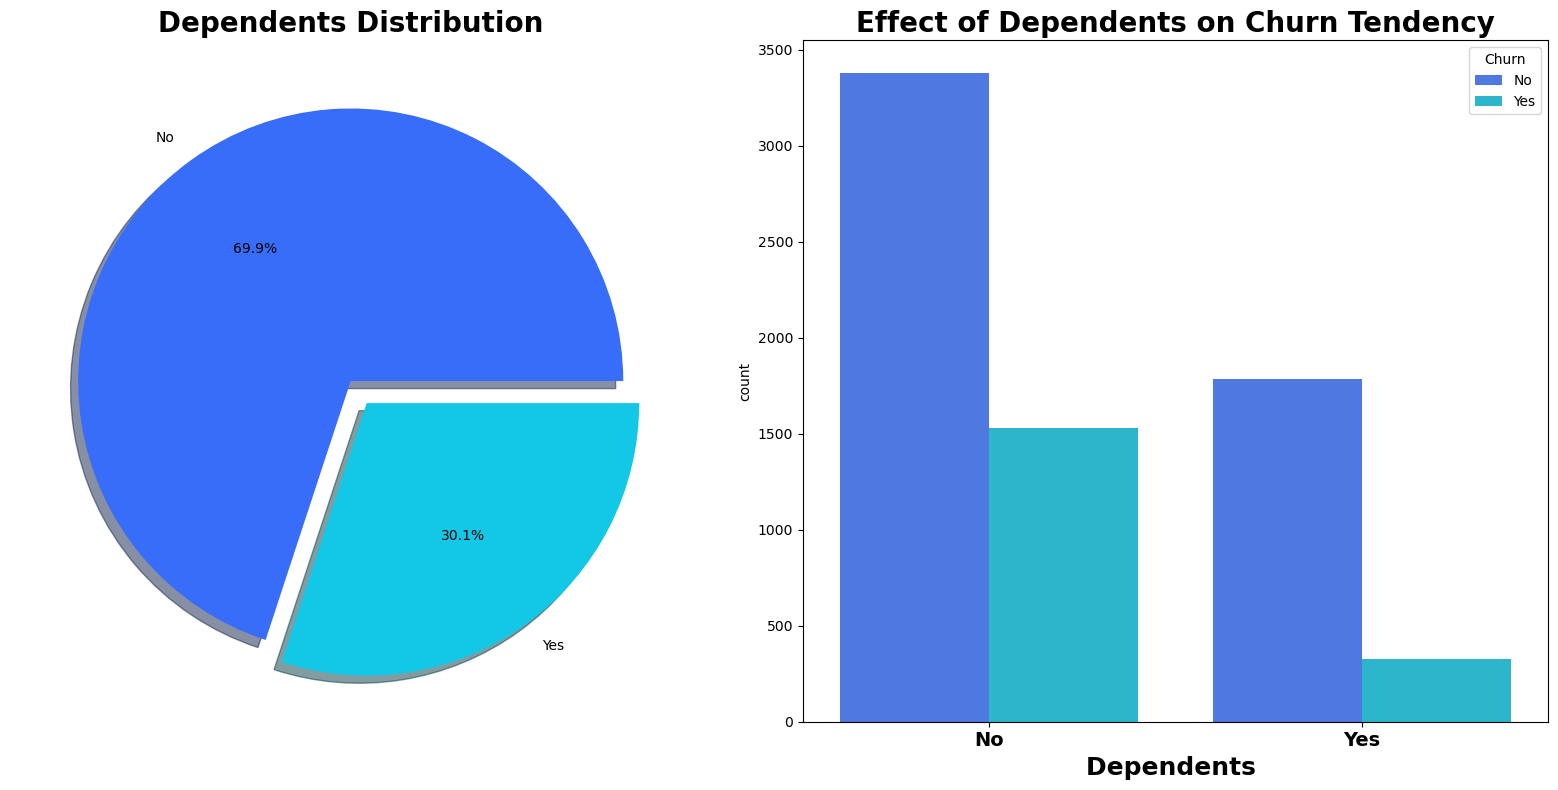

In [30]:

sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation-
- **Customer having Partner have less tendency to Churn.**
- **Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%**

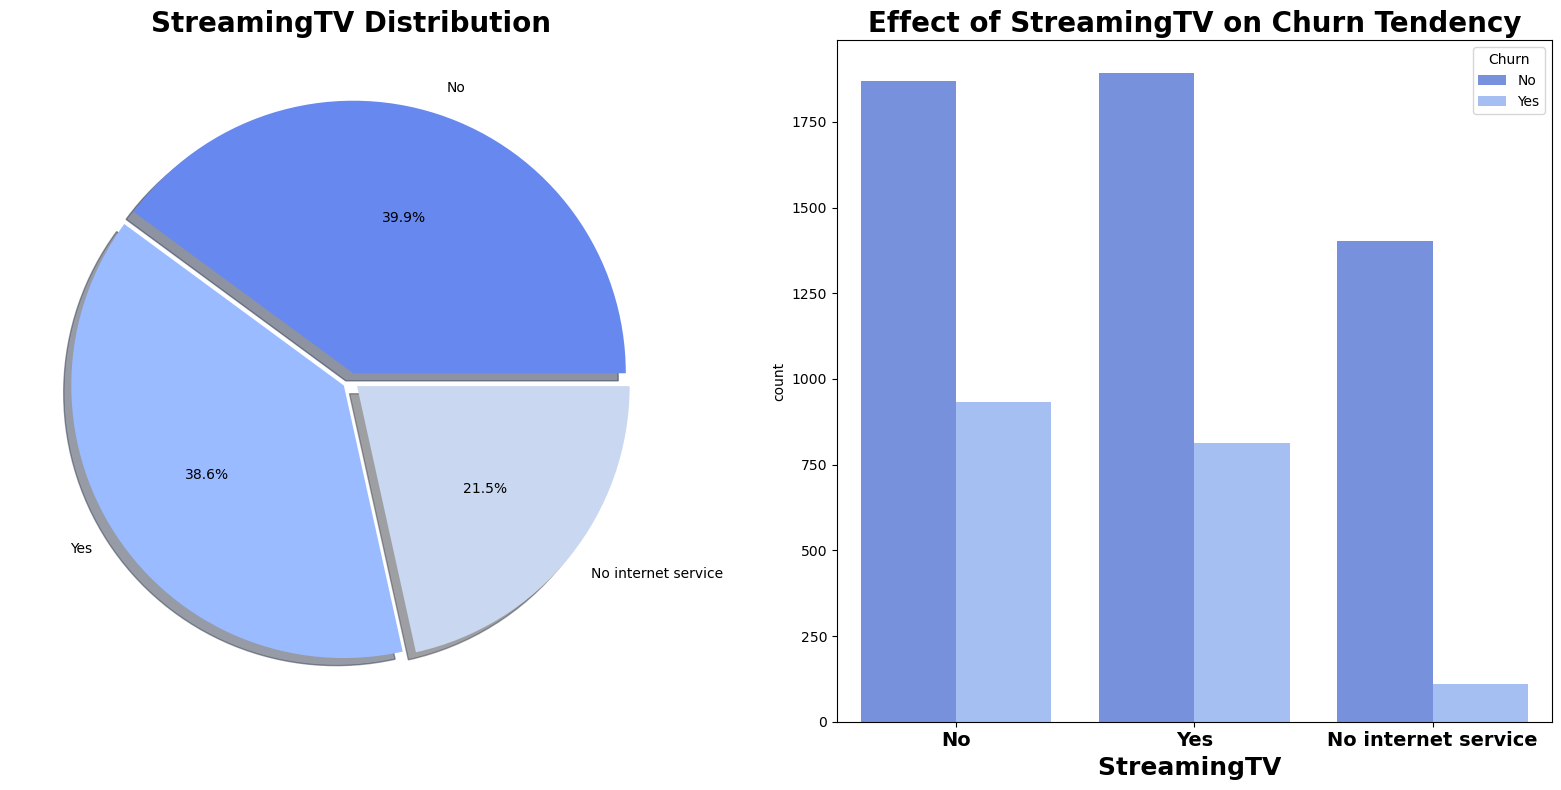

In [31]:
#plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

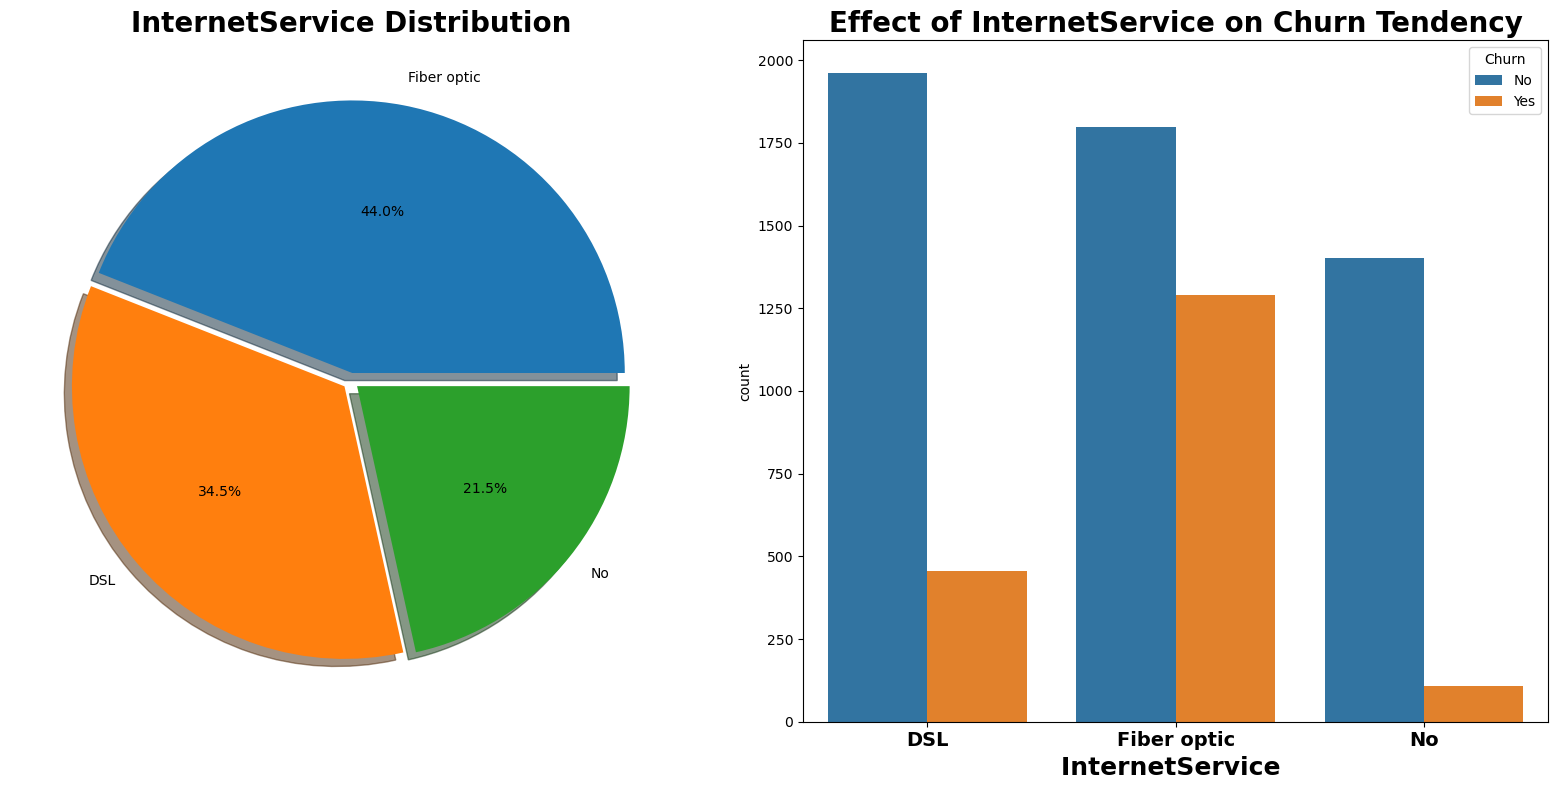

In [32]:
#plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

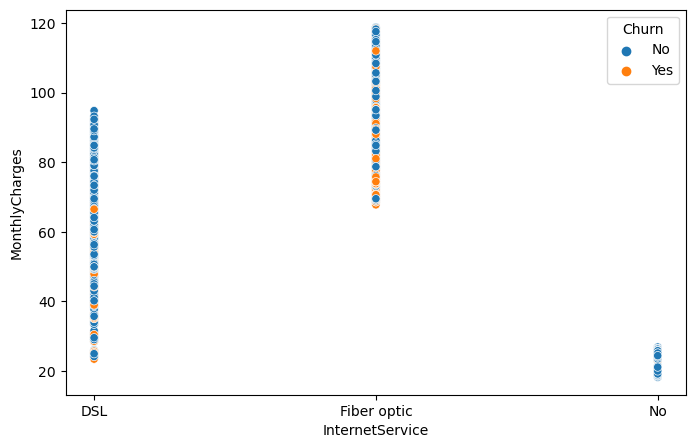

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

**44% Customer perfer Fibre optic as Interent service and surpringly we can find high churn rate among them.**

**We can find high monthly charges among customer using fiber optic compare to DSL. We can conclude that High charges is reason of customer churn.**

TypeError: countplot() got multiple values for argument 'data'

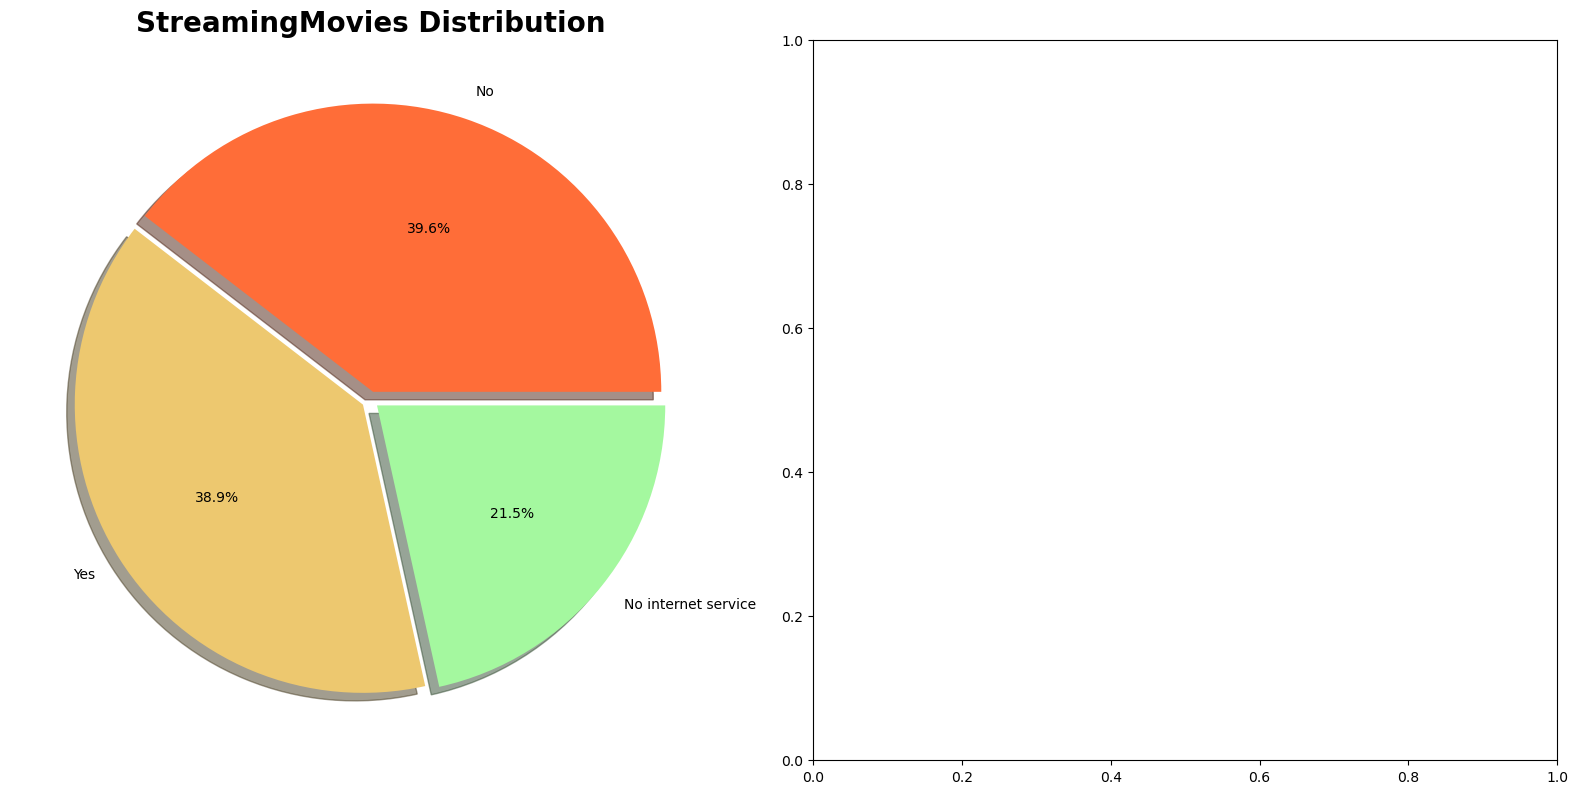

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**Almost same churn tendency in people streaming movies and not.**

TypeError: countplot() got multiple values for argument 'data'

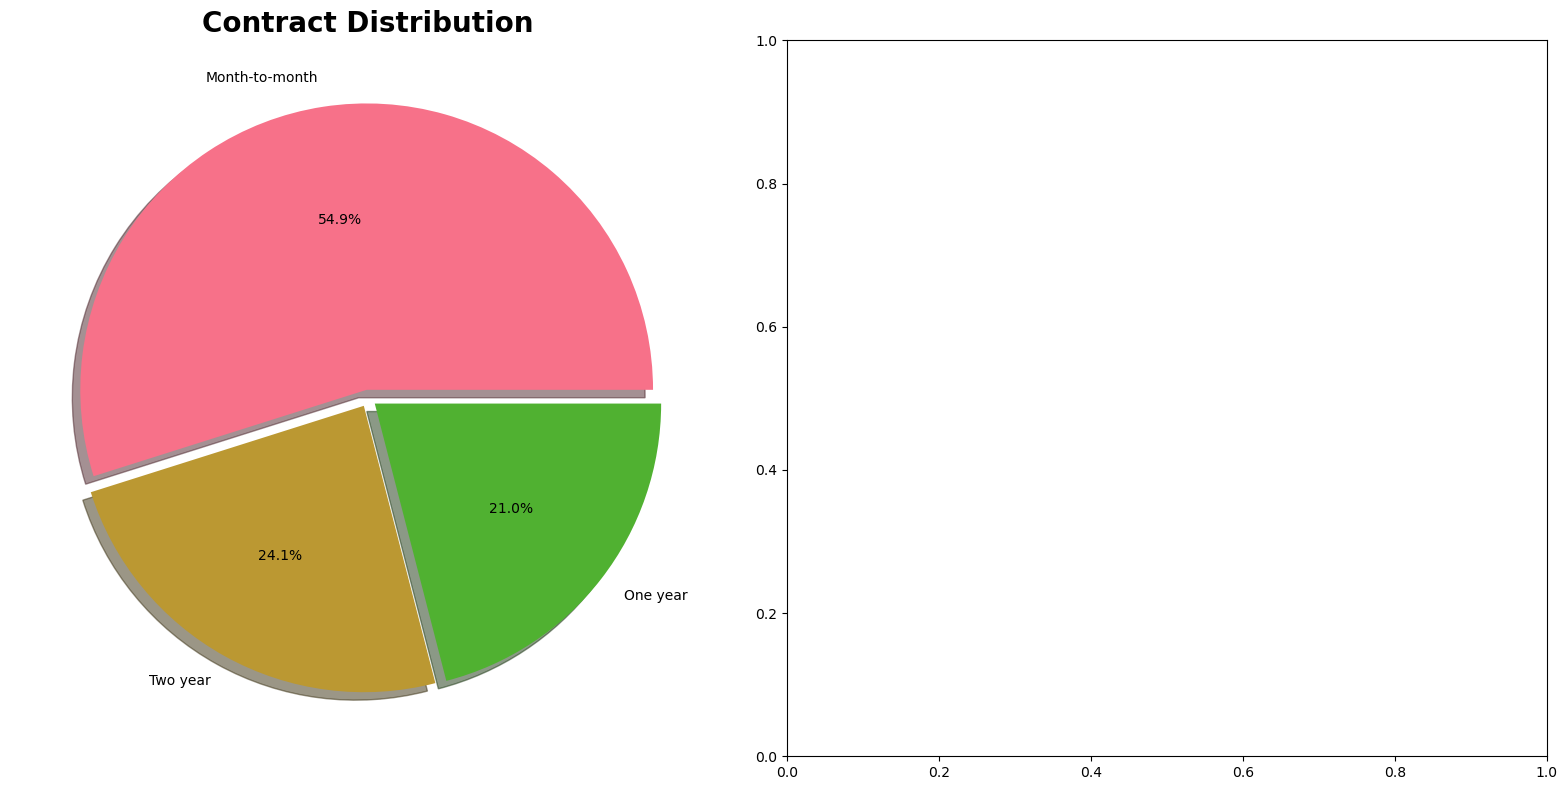

In [35]:
#plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

**Almost 55% customer perfer month to month contract compare to other.We also find high churn rate in these customer.**

**We did not find any relation between Monthly charges and contract tenure.**

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_earth')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**60% Customer perfer paperless billing.**

**The customers who prefer paperless billing they have high churn rate.**

In [ ]:
#plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

**We can see high Attrition tendency in customer who pay by Electronic check.**

In [ ]:
sns.set_palette('tab20_r')
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

#### Observation:
- **High Monthly Charges in customer who choose churn compare to rest.**
- **Same goes with High Total Charges in customer who choose churn compare to rest.**

In [ ]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

# Encoding categorical data

In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

In [ ]:
df.head()

In [ ]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']

In [ ]:
df["--"]=df["--"].astype("object")

In [ ]:
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [ ]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Categorical=df.select_dtypes(include="object")
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

# Feature selection and Engineering

## 1. Outliers Detection and Removal

In [ ]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b> From Boxplot we can see No outliers exist dataset.</b>

### Outliers removal using Zscore method

In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

In [ ]:
df['PhoneService'].unique()

In [ ]:
df.drop(['PhoneService'],axis=1,inplace=True)

In [ ]:
df.skew() #-0.5 to 0.5---

In [ ]:
num=["tenure","MonthlyCharges","TotalCharges"]

## 2. Skewness of features

In [ ]:
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in num:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data.**

**There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.**

In [ ]:
df.skew()  #-0.5 se 0.5

**'tenure','MonthlyCharges', 'TotalCharges' are continous numerical feature in dataset.** 

**Out of which TotalCharges is skewed in nature. Which we gone transform here.**

In [ ]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

## 3. Corrleation 

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

## 4. Balanceing Imbalanced target feature

In [ ]:
df.Churn.value_counts()

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [ ]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [ ]:
Y.value_counts()

<b><em> We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.</em></b>

## Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

 ## 5. Checking Multicollinearity between features using variance_inflation_factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

**Independent feature VIF is within permissible limit of 10**

# Machine Learning Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
# print('Training feature matrix size:',X_train.shape)
# print('Training target vector size:',Y_train.shape)
# print('Test feature matrix size:',X_test.shape)
# print('Test target vector size:',Y_test.shape)

### Finding best Random state

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=90, test_size=.3)
lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
print(classification_report(Y_test, y_pred))
print()
print(confusion_matrix(Y_test, y_pred))

### Finding Optimal value of n_neighbors for KNN

In [ ]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

#### Comment- 
At k=18, we get the minimum RMSE value which approximately 0.44059740636840716, and shoots up on further increasing the k value. We can safely say that k=18 will give us the best result in this case


## Applying other classification algorithm

In [ ]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

# CrossValidation :

In [ ]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')

# Hyper Parameter Tuning : GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {  'max_depth': [5, 10,20,40,50,60], 
              'criterion':['gini','entropy']}

In [ ]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameter)
GCV.fit(X_train,Y_train)

In [ ]:
GCV.best_params_

In [ ]:
dtc1=DecisionTreeClassifier(max_depth=40,criterion="entropy")

In [ ]:
dtc1.fit(X_train,y_train)
y_pred=dtc1.predict(X_test)
print(classification_report(y_pred,y_test))

# Final Model

In [ ]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=40 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

In [ ]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [ ]:
import joblib
joblib.dump(Final_mod,'Customer_Churn_Final.pkl')

## Predicting the Final Model

In [ ]:
# Prediction
prediction = Final_mod.predict(X_test)

In [ ]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()